#TD 2 Graph in ML

##Antonin GAY - MVA 2018-19

##1 Harmonic Function Solution

###Q 1.1

Nou appliquons la méthode HFS remplie sur les données Two moons. L'algorithme est assez efficace et donne systématiquement (si le graphe est connecté) les bons labels.

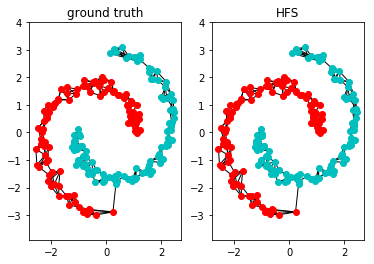

1.0

In [1]:
%matplotlib inline
import warnings
from harmonic_function_solution.HFS_func import *
warnings.filterwarnings('ignore')

two_moons_hfs()


###Q 1.2

Si nous prenons un très grande dataset, le risque est qu'en ne sélectionnant que 4 labels au hasard, ces 4 labels soient pris dans la même Lune et être tous du même label. L'algorithme ne voyant qu'un seul label dans les données qui lui sont données, il ne trouvera alors qu'un seul label.

Néanmoins, le code du masquage a été modifié de manière à s'assurer que tous les labels d'origine soient présents dans la version masquée.

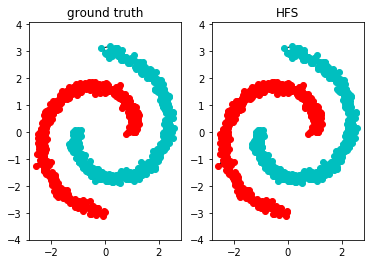

1.0

In [2]:
two_moons_hfs(large=True)

###Q 1.3

The soft-HFS allow us to give less importance to the values of the labeled points. This is particularly usefull when there is noise in the measures

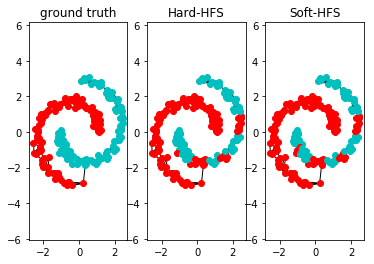

[0.85, 0.84]


In [9]:
print(hard_vs_soft_hfs(False, 0.05, c_l=100, c_u=1, k=5))


##2. Face recognition with HFS

In [1]:
from Face_recognition_with_HFS.Face_reco_func import *


###Q 2.1

We applied the same technics than previously with HFS clustering. In order to deal with many classes, we transformed our vector 'labels' into a matrix of size (number labeled samples)x(number of classes). Its values are $L_{ij}=1$ if the labeled sample $i$ is of the class $j$, and $0$ otherwise.

When we use this new matrix instead of our previous vector, we obtain a vector of size (number samples)x(number classes), and the sample $i$ is set in the class which has the greatest value on the line $i$

###Q 2.2

We will test the 3 types of filter in the next code. The HFS is used with the pixels of the images as arguments :

Filter = box


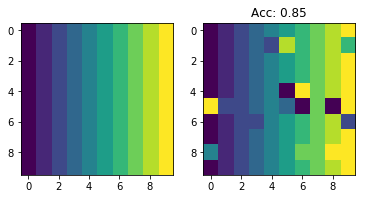

Filter = Gaussian


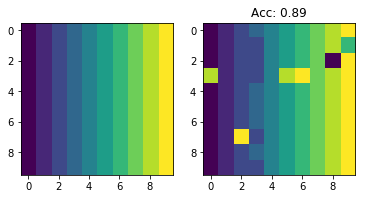

Filter = bilinear


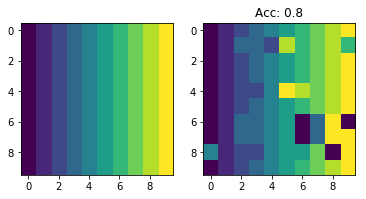

In [5]:
images, labels = face_image_loading(False)

print('Filter = box')
images_box = face_preprocessing(images, 'box', False)
lab_box = face_labeling(images_box, labels, var=100000, k=10)

print('Filter = Gaussian')
images_gau = face_preprocessing(images, 'Gaussian', False)
lab_gau = face_labeling(images_gau, labels, var=100000, k=10)

print('Filter = bilinear')
images_bil = face_preprocessing(images, 'bilinear', False)
lab_bil = face_labeling(images_bil, labels, var=100000, k=10)


From the previous results, seems like the three methods are quite close, even though the gaussian blur presents better results.

###Q 2.3

From the previous results, it seems like the HFS presents pretty good results on this task, with up to 90% of success.

###Q 2.4

In the next example, we add new data from an extended dataset, and observe the results on our accuracy.

Loading images:   0%|          | 0/10 [00:00<?, ?it/s]

Loading images:  10%|█         | 1/10 [00:07<01:10,  7.89s/it]

Loading images:  20%|██        | 2/10 [00:14<01:00,  7.53s/it]

Loading images:  30%|███       | 3/10 [00:21<00:51,  7.42s/it]

Loading images:  40%|████      | 4/10 [00:29<00:44,  7.37s/it]

Loading images:  50%|█████     | 5/10 [00:37<00:38,  7.63s/it]

Loading images:  60%|██████    | 6/10 [00:43<00:29,  7.30s/it]

Loading images:  70%|███████   | 7/10 [00:51<00:22,  7.33s/it]

Loading images:  80%|████████  | 8/10 [00:57<00:14,  7.10s/it]

Loading images:  90%|█████████ | 9/10 [01:05<00:07,  7.43s/it]

Loading images: 100%|██████████| 10/10 [01:19<00:00,  9.16s/it]

Filter = box

Preprocessing box:   0%|          | 0/500 [00:00<?, ?it/s]

Preprocessing box:  75%|███████▍  | 374/500 [00:00<00:00, 3464.98it/s]

Preprocessing box: 100%|██████████| 500/500 [00:00<00:00, 3819.02it/s]

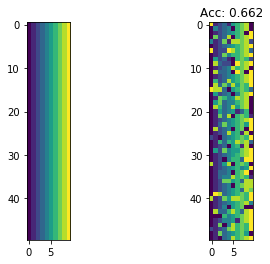

Filter = Gaussian

Preprocessing Gaussian:   0%|          | 0/500 [00:00<?, ?it/s]

Preprocessing Gaussian:  97%|█████████▋| 486/500 [00:00<00:00, 4814.66it/s]

Preprocessing Gaussian: 100%|██████████| 500/500 [00:00<00:00, 4764.63it/s]

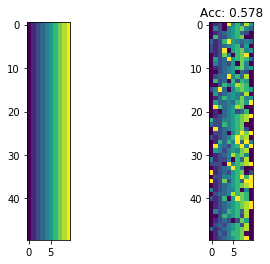

Filter = bilinear

Preprocessing bilinear:   0%|          | 0/500 [00:00<?, ?it/s]

Preprocessing bilinear:  15%|█▌        | 76/500 [00:00<00:00, 752.65it/s]

Preprocessing bilinear:  54%|█████▎    | 268/500 [00:00<00:00, 919.29it/s]

Preprocessing bilinear:  70%|███████   | 352/500 [00:00<00:00, 888.52it/s]

Preprocessing bilinear:  92%|█████████▏| 459/500 [00:00<00:00, 933.84it/s]

Preprocessing bilinear: 100%|██████████| 500/500 [00:00<00:00, 1071.20it/s]

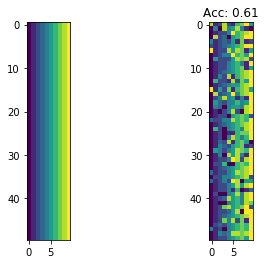

In [2]:
images, labels = augmented_image_loading(False)

print('Filter = box')
images_box = face_preprocessing(images, 'box', False)
lab_box = face_labeling(images_box, labels, var=100000, k=10)

print('Filter = Gaussian')
images_gau = face_preprocessing(images, 'Gaussian', False)
lab_gau = face_labeling(images_gau, labels, var=100000, k=10)

print('Filter = bilinear')
images_bil = face_preprocessing(images, 'bilinear', False)
lab_bil = face_labeling(images_bil, labels, var=100000, k=10)


Adding new data to the dataset did not improve our results, at the contrary, it reduced our accuracy. However, the new added data may have been too far away from the original ones, causing the clustering to hesitate.

Adding new data could improve performance if those new data were close from the original ones, assuring thus a clear separation between clusters.

###Q 2.5

The new data were far away from the original ones, and thus they were not added at the good place when the clustering was done. For example, some faces from the extended dataset are side-faces, instead of front-facing. Those may be particularly hard to understand for the algorithm, which only compares the values of the pixels. Thus, the faces whose position are not the same as the other ones could degrade the performance of the algorithm.

At the contrary, a face with a new expression, but up front can enhance the performance, as it would be linked to the right person, and add new informations of what its face can look like.